In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv 
import numpy as np

Let's answer these 4 questions:
1. Highest correlation characteristic(s)
2. Biggest change over years
3. Characteristic(s) that impact that change
4. Surprising outliers

1. Highest correlation characteristic(s)
 - correlation for each column
 - correlation for each combo of columns, 7 columns
    - 5913 possibilities, maybe, if we did math right 7! + 6! + 5! + ... + 1! = 5913
 - produce a matplotlib graph of the column, or combo of columns, with highest correlation

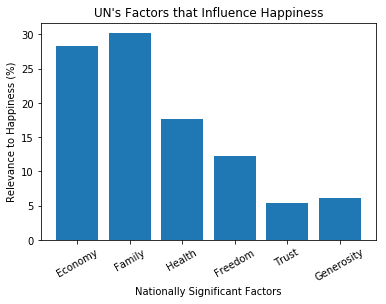

In [2]:
# Create a list of the filenames of the datasets.
dataSets = [
    'world-happiness-report/2015.csv',
    'world-happiness-report/2016.csv',
    'world-happiness-report/2017.csv'
           ]

# The column names in the csv files are inconsistent.
# Create a list of common column names for two datasets.
factorNames2015and2016 = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
                         ]
# Create a list of column names for the third dataset.
factorNames2017 = [
    'Economy..GDP.per.Capita.',
    'Family',
    'Health..Life.Expectancy.',
    'Freedom',
    'Generosity',
    'Trust..Government.Corruption.'
                  ]
# Create a list of the lists of column names.
factorsByYear = [
    factorNames2015and2016,
    factorNames2015and2016,
    factorNames2017
                ]

# Create a list to hold lists of column averages per dataset.
threeAverages = [[], [], []]

# Iterate over the datasets, finding the averages per column.
for i in range(len(dataSets)):
    frame = pd.read_csv(dataSets[i])
    factorsByUN = factorsByYear[i]

    for factor in factorsByUN:
        columnData = list(frame[factor])
        average = sum(columnData) / len(columnData)
        threeAverages[i].append(average)

# Determine the averages of the averages and put them in a list.
averages = []
quantityAves = len(factorNames2015and2016)
for i in range(quantityAves):
    averages.append(
                       (
                           threeAverages[0][i] + 
                           threeAverages[1][i] + 
                           threeAverages[2][i]
                       ) / quantityAves
                   )

# Determine the amount of happiness accounted for by each column.
averagePercents = []
happinessSum = sum(averages)
for i in range(len(averages)):
    # Calculate the national happiness percentage of the column.
    averagePercents.append(averages[i] / happinessSum * 100)

# Abbreviate the names of the factors for readability.
xLabels = []
for factor in factorNames2015and2016:
    xLabels.append(factor.split()[0])

indices = np.arange(len(factorNames2015and2016))
plt.bar(indices, averagePercents)
plt.xticks(indices, xLabels, rotation = 30)
plt.xlabel("Nationally Significant Factors")
plt.ylabel("Relevance to Happiness (%)")
plt.title("UN's Factors that Influence Happiness")
plt.show()


2. Biggest change over years
 - Programmatically find the country who wins "most improved" award
 - graph it

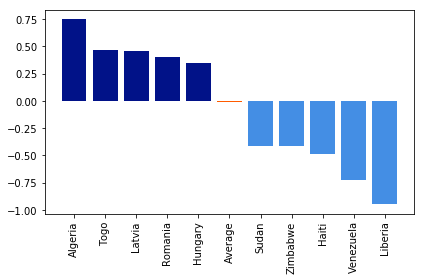

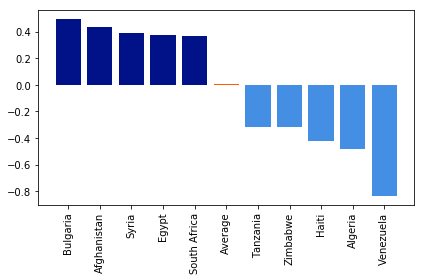

In [3]:
def secondElem(s):
    return s[1]

def barGraph(xVals, yVals):
    top5 = '#011288'
    avg = '#ff5b00'
    bot5 = '#448ee4'
    colorList = [top5, top5, top5, top5, top5, avg, bot5, bot5, bot5, bot5, bot5]
    ind = range(len(xVals))
    plt.bar(ind, yVals, color=colorList)
    plt.xticks(ind, xVals, rotation=90)
    plt.tight_layout()
    plt.show()

f15 = open('world-happiness-report/2015.csv', 'r')
f16 = open('world-happiness-report/2016.csv', 'r')
f17 = open('world-happiness-report/2017.csv', 'r')

reader15 = csv.DictReader(f15)
reader16 = csv.DictReader(f16)
reader17 = csv.DictReader(f17)

countries15 = []
countries16 = []
countries17 = []
scores15 = []
scores16 = []
scores17 = []
for row in reader15:
    country = row['Country']
    countries15.append(country)
    score = row['Happiness Score']
    scores15.append(score)
for row in reader16:
    country = row['Country']
    countries16.append(country)
    score = row['Happiness Score']
    scores16.append(score)
for row in reader17:
    country = row['Country']
    countries17.append(country)
    score = row['Happiness.Score']
    scores17.append(score)

countriesAll3 = []
for country in countries15:
    if country in countries16:
        if country in countries17:
            countriesAll3.append(country)

change15to16 = {}
for country in countriesAll3:
    indCountry15 = countries15.index(country)
    score = scores15[indCountry15]
    indCountry16 = countries16.index(country)
    scr = scores16[indCountry16]
    change15to16[country] = float(scr) - float(score)

change16to17 = {}
for country in countriesAll3:
    indCountry16 = countries16.index(country)
    score = scores16[indCountry16]
    indCountry17 = countries17.index(country)
    scr = scores17[indCountry17]
    change16to17[country] = float(scr) - float(score)

list15to16 = []
list16to17 = []
changes1 = []
changes2 = []
for country in change15to16:
    change1 = change15to16[country]
    change2 = change16to17[country]
    changes1.append(change1)
    changes2.append(change2)
    list15to16.append((country, change1))
    list16to17.append((country, change2))

avgChange1 = sum(changes1)/len(changes1)
avgChange2 = sum(changes2)/len(changes2)

sorted15to16 = sorted(list15to16, key=secondElem)
# print(sorted15to16)
bot5_15to16 = sorted15to16[:5]
bot5_15to16.reverse()
sorted15to16.reverse()
top5_15to16 = sorted15to16[:5]

sorted16to17 = sorted(list16to17, key=secondElem)
bot5_16to17 = sorted16to17[:5]
bot5_16to17.reverse()
sorted16to17.reverse()
top5_16to17 = sorted16to17[:5]

xVals1 = []
yVals1 = []
for (country,change) in top5_15to16:
    xVals1.append(country)
    yVals1.append(change)
xVals1.append('Average')
yVals1.append(avgChange1)
for (country,change) in bot5_15to16:
    xVals1.append(country)
    yVals1.append(change)
# print(xVals1)
# print(yVals1)

xVals2 = []
yVals2 = []
for (country,change) in top5_16to17:
    xVals2.append(country)
    yVals2.append(change)
xVals2.append('Average')
yVals2.append(avgChange2)
for (country,change) in bot5_16to17:
    xVals2.append(country)
    yVals2.append(change)
# print(xVals2)
# print(yVals2)

barGraph(xVals1, yVals1)
barGraph(xVals2, yVals2)

f15.close()
f16.close()
f17.close()


3. Characteristic(s) that impact that change
 - using methods from question 1, find and graph what way most likely to cause the change

4. Surprising outliers
 - Anomolous countries, e.g., Costa Rica, that don't fit the trend